# Basic data analysis

This notebook is mainly a playground / ad-hoc analysis of already labeled data.

In [14]:
from pathlib import Path
import pandas as pd
import plotly.io as pio

pio.renderers.default = "vscode"

In [15]:
base_data_path = Path('../data')
annotations_path = base_data_path / 'annotation_per_row_data.csv'
audio_data_path = base_data_path / 'audio'

list(audio_data_path.glob('*.wav'))

[PosixPath('../data/audio/recording_2024-11-15_14-10-35.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-21-59.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-32-41.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-18-08.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-22-18.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-26-00.wav'),
 PosixPath('../data/audio/recording_2024-10-30_19-34.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-17-18.wav'),
 PosixPath('../data/audio/recording_2024-11-15_12-34-56.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-21-09.wav'),
 PosixPath('../data/audio/recording_2024-11-15_11-18-42.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-17-46.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-22-10.wav'),
 PosixPath('../data/audio/recording_2024-11-15_11-01-44.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-15-56.wav'),
 PosixPath('../data/audio/recording_2024-11-15_14-22-17.wa

In [35]:
annotations = pd.read_csv(annotations_path)

# fix audio data path

old_data_path_prefix = '/data/local-files/?d=bell_detector_data/raw_data'

annotations['audio_path'] = annotations.remote_audio_path.apply(lambda file_uri: file_uri.replace(old_data_path_prefix, str(audio_data_path)))
annotations

Unnamed: 0  annotation_id  file_id  start   end       label  \
0             0            568      419    0.0   7.0  background   
1             1            433      232    0.0   7.0  background   
2             2            565      416    0.0   7.0  background   
3             3            629      480    0.0   7.0  background   
4             4            325      524    0.0   7.0  background   
..          ...            ...      ...    ...   ...         ...   
673         673            279      378    0.0   7.0  background   
674         674            417      216    0.0   7.0  background   
675         675            145      144    0.0   7.0  background   
676         676             15       14    0.0  33.5  background   
677         677            327      526    0.0   7.0  background   

                       audio_file_name  \
0    recording_2024-11-15_13-26-47.wav   
1    recording_2024-11-15_11-13-15.wav   
2    recording_2024-11-15_13-23-33.wav   
3    recording_2024-11-15_14-13-07.wav   
4    recording_2024-11-15_14-18-31.wav   
..                                 ...   
673  recording_2024-11-15_12-55-06.wav   
674  recording_2024-11-15_11-01-08.wav   
675  recording_2024-11-15_09-31-51.wav   
676     recording_2024-10-25_14-51.wav   
677  recording_2024-11-15_14-18-45.wav   

                                     remote_audio_path  \
0    /data/local-files/?d=bell_detector_data/raw_da...   
1    /data/local-files/?d=bell_detector_data/raw_da...   
2    /data/local-files/?d=bell_detector_data/raw_da...   
3    /data/local-files/?d=bell_detector_data/raw_da...   
4    /data/local-files/?d=bell_detector_data/raw_da...   
..                                                 ...   
673  /data/local-files/?d=bell_detector_data/raw_da...   
674  /data/local-files/?d=bell_detector_data/raw_da...   
675  /data/local-files/?d=bell_detector_data/raw_da...   
676  /data/local-files/?d=bell_detector_data/raw_da...   
677  /data/local-files/?d=bell_detector_data/raw_da...   

                                          audio_path  
0    ../data/audio/recording_2024-11-15_13-26-47.wav  
1    ../data/audio/recording_2024-11-15_11-13-15.wav  
2    ../data/audio/recording_2024-11-15_13-23-33.wav  
3    ../data/audio/recording_2024-11-15_14-13-07.wav  
4    ../data/audio/recording_2024-11-15_14-18-31.wav  
..                                               ...  
673  ../data/audio/recording_2024-11-15_12-55-06.wav  
674  ../data/audio/recording_2024-11-15_11-01-08.wav  
675  ../data/audio/recording_2024-11-15_09-31-51.wav  
676     ../data/audio/recording_2024-10-25_14-51.wav  
677  ../data/audio/recording_2024-11-15_14-18-45.wav  

[678 rows x 9 columns]

In [36]:
filtered_annotations = annotations[annotations['label'].isin(['gardendoor_bell', 'housedoor_bell', 'flatdoor_bell'])]
filtered_annotations

Unnamed: 0  annotation_id  file_id       start         end  \
56           56             18       17  202.883038  207.923135   
79           79             31       30    1.054482    8.752197   
166         166             20       19    8.119508   14.257469   
175         175             69       69    0.000000    0.622871   
207         207            654      654    1.712998    6.942149   
210         210            656      656    6.172382   11.177016   
241         241             68       68    0.000000    0.827251   
261         261             60       60    0.350365    3.493917   
305         305             63       63    0.291971    3.639903   
317         317            103      651    3.038898    7.925446   
327         327             39       38    0.000000    3.535714   
329         329             39       38   29.571429   34.328772   
331         331             39       38   40.622163   45.000000   
334         334             44       43    0.738462    5.907692   
362         362             61       61    0.525547    4.934307   
445         445             14       13   22.613192   25.768507   
446         446             14       13   28.778695   32.027824   
447         447             14       13   37.389764   41.739658   
448         448             14       13   45.938129   50.814638   
493         493             13       12   32.967327   37.461622   
501         501             67       67    0.428224    4.778589   
520         520             42       41   11.372308   16.763077   
544         544             65       65    0.000000    0.798054   
545         545             65       65    0.807786    8.000000   
565         565             32       31    0.000000    3.479789   
645         645             64       64    0.233577    3.902676   
658         658             62       62    0.545012    4.895377   

               label                    audio_file_name  \
56    housedoor_bell     recording_2024-10-25_16-04.wav   
79   gardendoor_bell     recording_2024-10-27_12-22.wav   
166  gardendoor_bell     recording_2024-10-26_15-00.wav   
175   housedoor_bell  recording_2024-11-14_15-57-50.wav   
207   housedoor_bell     recording_2024-12-04_15-05.wav   
210   housedoor_bell     recording_2024-12-17_15-23.wav   
241   housedoor_bell  recording_2024-11-14_15-57-43.wav   
261    flatdoor_bell  recording_2024-11-14_15-55-50.wav   
305    flatdoor_bell  recording_2024-11-14_15-56-25.wav   
317   housedoor_bell     recording_2024-11-16_11-43.wav   
327  gardendoor_bell     recording_2024-11-02_15-50.wav   
329   housedoor_bell     recording_2024-11-02_15-50.wav   
331    flatdoor_bell     recording_2024-11-02_15-50.wav   
334   housedoor_bell     recording_2024-11-08_11-29.wav   
362   housedoor_bell  recording_2024-11-14_15-56-04.wav   
445    flatdoor_bell               2024-10-24-15-53.wav   
446    flatdoor_bell               2024-10-24-15-53.wav   
447   housedoor_bell               2024-10-24-15-53.wav   
448   housedoor_bell               2024-10-24-15-53.wav   
493   housedoor_bell          record-24-10-02-19-34.wav   
501   housedoor_bell  recording_2024-11-14_15-57-36.wav   
520   housedoor_bell     recording_2024-11-06_17-40.wav   
544    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
545    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
565   housedoor_bell     recording_2024-10-27_15-04.wav   
645    flatdoor_bell  recording_2024-11-14_15-56-38.wav   
658   housedoor_bell  recording_2024-11-14_15-56-14.wav   

                                     remote_audio_path  \
56   /data/local-files/?d=bell_detector_data/raw_da...   
79   /data/local-files/?d=bell_detector_data/raw_da...   
166  /data/local-files/?d=bell_detector_data/raw_da...   
175  /data/local-files/?d=bell_detector_data/raw_da...   
207  /data/local-files/?d=bell_detector_data/raw_da...   
210  /data/local-files/?d=bell_detector_data/raw_da...   
241  /data/local-files/?d=bell_detector_data/raw_da...   
261  /data/

In [37]:
filtered_annotations.insert(3, 'duration', filtered_annotations.end - filtered_annotations.start)
filtered_annotations

Unnamed: 0  annotation_id  file_id  duration       start         end  \
56           56             18       17  5.040097  202.883038  207.923135   
79           79             31       30  7.697715    1.054482    8.752197   
166         166             20       19  6.137961    8.119508   14.257469   
175         175             69       69  0.622871    0.000000    0.622871   
207         207            654      654  5.229151    1.712998    6.942149   
210         210            656      656  5.004634    6.172382   11.177016   
241         241             68       68  0.827251    0.000000    0.827251   
261         261             60       60  3.143552    0.350365    3.493917   
305         305             63       63  3.347932    0.291971    3.639903   
317         317            103      651  4.886548    3.038898    7.925446   
327         327             39       38  3.535714    0.000000    3.535714   
329         329             39       38  4.757343   29.571429   34.328772   
331         331             39       38  4.377837   40.622163   45.000000   
334         334             44       43  5.169231    0.738462    5.907692   
362         362             61       61  4.408759    0.525547    4.934307   
445         445             14       13  3.155315   22.613192   25.768507   
446         446             14       13  3.249130   28.778695   32.027824   
447         447             14       13  4.349894   37.389764   41.739658   
448         448             14       13  4.876509   45.938129   50.814638   
493         493             13       12  4.494295   32.967327   37.461622   
501         501             67       67  4.350365    0.428224    4.778589   
520         520             42       41  5.390769   11.372308   16.763077   
544         544             65       65  0.798054    0.000000    0.798054   
545         545             65       65  7.192214    0.807786    8.000000   
565         565             32       31  3.479789    0.000000    3.479789   
645         645             64       64  3.669100    0.233577    3.902676   
658         658             62       62  4.350365    0.545012    4.895377   

               label                    audio_file_name  \
56    housedoor_bell     recording_2024-10-25_16-04.wav   
79   gardendoor_bell     recording_2024-10-27_12-22.wav   
166  gardendoor_bell     recording_2024-10-26_15-00.wav   
175   housedoor_bell  recording_2024-11-14_15-57-50.wav   
207   housedoor_bell     recording_2024-12-04_15-05.wav   
210   housedoor_bell     recording_2024-12-17_15-23.wav   
241   housedoor_bell  recording_2024-11-14_15-57-43.wav   
261    flatdoor_bell  recording_2024-11-14_15-55-50.wav   
305    flatdoor_bell  recording_2024-11-14_15-56-25.wav   
317   housedoor_bell     recording_2024-11-16_11-43.wav   
327  gardendoor_bell     recording_2024-11-02_15-50.wav   
329   housedoor_bell     recording_2024-11-02_15-50.wav   
331    flatdoor_bell     recording_2024-11-02_15-50.wav   
334   housedoor_bell     recording_2024-11-08_11-29.wav   
362   housedoor_bell  recording_2024-11-14_15-56-04.wav   
445    flatdoor_bell               2024-10-24-15-53.wav   
446    flatdoor_bell               2024-10-24-15-53.wav   
447   housedoor_bell               2024-10-24-15-53.wav   
448   housedoor_bell               2024-10-24-15-53.wav   
493   housedoor_bell          record-24-10-02-19-34.wav   
501   housedoor_bell  recording_2024-11-14_15-57-36.wav   
520   housedoor_bell     recording_2024-11-06_17-40.wav   
544    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
545    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
565   housedoor_bell     recording_2024-10-27_15-04.wav   
645    flatdoor_bell  recording_2024-11-14_15-56-38.wav   
658   housedoor_bell  recording_2024-11-14_15-56-14.wav   

                                     remote_audio_path  \
56   /data/local-files/?d=bell_detector_data/raw_da...   
79   /data/local-files/?d=bell_detector_data/raw_da...   
166  /data/local-file

In [39]:
filtered_annotations = filtered_annotations.sort_values('label')
filtered_annotations = filtered_annotations[filtered_annotations.start != 0] # remove recordings which start at 0 because they are probably some kind of cut off in the beginning
filtered_annotations

Unnamed: 0  annotation_id  file_id  duration       start         end  \
305         305             63       63  3.347932    0.291971    3.639903   
645         645             64       64  3.669100    0.233577    3.902676   
331         331             39       38  4.377837   40.622163   45.000000   
445         445             14       13  3.155315   22.613192   25.768507   
261         261             60       60  3.143552    0.350365    3.493917   
446         446             14       13  3.249130   28.778695   32.027824   
545         545             65       65  7.192214    0.807786    8.000000   
166         166             20       19  6.137961    8.119508   14.257469   
79           79             31       30  7.697715    1.054482    8.752197   
207         207            654      654  5.229151    1.712998    6.942149   
210         210            656      656  5.004634    6.172382   11.177016   
317         317            103      651  4.886548    3.038898    7.925446   
329         329             39       38  4.757343   29.571429   34.328772   
362         362             61       61  4.408759    0.525547    4.934307   
501         501             67       67  4.350365    0.428224    4.778589   
56           56             18       17  5.040097  202.883038  207.923135   
448         448             14       13  4.876509   45.938129   50.814638   
493         493             13       12  4.494295   32.967327   37.461622   
447         447             14       13  4.349894   37.389764   41.739658   
520         520             42       41  5.390769   11.372308   16.763077   
334         334             44       43  5.169231    0.738462    5.907692   
658         658             62       62  4.350365    0.545012    4.895377   

               label                    audio_file_name  \
305    flatdoor_bell  recording_2024-11-14_15-56-25.wav   
645    flatdoor_bell  recording_2024-11-14_15-56-38.wav   
331    flatdoor_bell     recording_2024-11-02_15-50.wav   
445    flatdoor_bell               2024-10-24-15-53.wav   
261    flatdoor_bell  recording_2024-11-14_15-55-50.wav   
446    flatdoor_bell               2024-10-24-15-53.wav   
545    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
166  gardendoor_bell     recording_2024-10-26_15-00.wav   
79   gardendoor_bell     recording_2024-10-27_12-22.wav   
207   housedoor_bell     recording_2024-12-04_15-05.wav   
210   housedoor_bell     recording_2024-12-17_15-23.wav   
317   housedoor_bell     recording_2024-11-16_11-43.wav   
329   housedoor_bell     recording_2024-11-02_15-50.wav   
362   housedoor_bell  recording_2024-11-14_15-56-04.wav   
501   housedoor_bell  recording_2024-11-14_15-57-36.wav   
56    housedoor_bell     recording_2024-10-25_16-04.wav   
448   housedoor_bell               2024-10-24-15-53.wav   
493   housedoor_bell          record-24-10-02-19-34.wav   
447   housedoor_bell               2024-10-24-15-53.wav   
520   housedoor_bell     recording_2024-11-06_17-40.wav   
334   housedoor_bell     recording_2024-11-08_11-29.wav   
658   housedoor_bell  recording_2024-11-14_15-56-14.wav   

                                     remote_audio_path  \
305  /data/local-files/?d=bell_detector_data/raw_da...   
645  /data/local-files/?d=bell_detector_data/raw_da...   
331  /data/local-files/?d=bell_detector_data/raw_da...   
445  /data/local-files/?d=bell_detector_data/raw_da...   
261  /data/local-files/?d=bell_detector_data/raw_da...   
446  /data/local-files/?d=bell_detector_data/raw_da...   
545  /data/local-files/?d=bell_detector_data/raw_da...   
166  /data/local-files/?d=bell_detector_data/raw_da...   
79   /data/local-files/?d=bell_detector_data/raw_da...   
207  /data/local-files/?d=bell_detector_data/raw_da...   
210  /data/local-files/?d=bell_detector_data/raw_da...   
317  /data/local-files/?d=bell_detector_data/raw_da...   
329  /data/local-files/?d=bell_detector_data/raw_da...   
362  /data/local-files/?d=bell_detector_data/raw_da...   
501  

In [40]:
for cls in filtered_annotations.groupby('label'):
    print(f'{cls[0]} mean duration {cls[1].duration.mean()} += {cls[1].duration.std()}')

flatdoor_bell mean duration 4.019297076427108 += 1.4649161049333648
gardendoor_bell mean duration 6.917838312829525 += 1.1029125980721632
housedoor_bell mean duration 4.792920010433151 += 0.36934718771640496


According to this stats I would say a housedoor bell got about 5s duration and the gardendoor about 7.5s.
Since I do this mainly to get a useful timeframe for my data collection script, this is sufficent for now.
I need to check for the amplitudes over time, since I want to use this as first simple collection rule.

In [41]:
from pydub import AudioSegment
import numpy as np


def load_audio_segment(row):
    audio = AudioSegment.from_wav(row['audio_path'])
    start_s = row['start'] - 1 if row['start'] > 1 else 0
    end_s = row['end'] + 1 if row['end'] < len(audio) else len(audio)
    start_ms = start_s * 1000 # convert to milliseconds
    end_ms = end_s * 1000 # convert to milliseconds
    start_ms = 0 if start_ms < 0 else start_ms
    end_ms = len(audio) if end_ms > len(audio) else end_ms
    segment = audio[start_ms:end_ms]
    return np.array(segment.get_array_of_samples())

filtered_annotations['audio'] = filtered_annotations.apply(load_audio_segment, axis=1)
filtered_annotations

Unnamed: 0  annotation_id  file_id  duration       start         end  \
305         305             63       63  3.347932    0.291971    3.639903   
645         645             64       64  3.669100    0.233577    3.902676   
331         331             39       38  4.377837   40.622163   45.000000   
445         445             14       13  3.155315   22.613192   25.768507   
261         261             60       60  3.143552    0.350365    3.493917   
446         446             14       13  3.249130   28.778695   32.027824   
545         545             65       65  7.192214    0.807786    8.000000   
166         166             20       19  6.137961    8.119508   14.257469   
79           79             31       30  7.697715    1.054482    8.752197   
207         207            654      654  5.229151    1.712998    6.942149   
210         210            656      656  5.004634    6.172382   11.177016   
317         317            103      651  4.886548    3.038898    7.925446   
329         329             39       38  4.757343   29.571429   34.328772   
362         362             61       61  4.408759    0.525547    4.934307   
501         501             67       67  4.350365    0.428224    4.778589   
56           56             18       17  5.040097  202.883038  207.923135   
448         448             14       13  4.876509   45.938129   50.814638   
493         493             13       12  4.494295   32.967327   37.461622   
447         447             14       13  4.349894   37.389764   41.739658   
520         520             42       41  5.390769   11.372308   16.763077   
334         334             44       43  5.169231    0.738462    5.907692   
658         658             62       62  4.350365    0.545012    4.895377   

               label                    audio_file_name  \
305    flatdoor_bell  recording_2024-11-14_15-56-25.wav   
645    flatdoor_bell  recording_2024-11-14_15-56-38.wav   
331    flatdoor_bell     recording_2024-11-02_15-50.wav   
445    flatdoor_bell               2024-10-24-15-53.wav   
261    flatdoor_bell  recording_2024-11-14_15-55-50.wav   
446    flatdoor_bell               2024-10-24-15-53.wav   
545    flatdoor_bell  recording_2024-11-14_15-56-45.wav   
166  gardendoor_bell     recording_2024-10-26_15-00.wav   
79   gardendoor_bell     recording_2024-10-27_12-22.wav   
207   housedoor_bell     recording_2024-12-04_15-05.wav   
210   housedoor_bell     recording_2024-12-17_15-23.wav   
317   housedoor_bell     recording_2024-11-16_11-43.wav   
329   housedoor_bell     recording_2024-11-02_15-50.wav   
362   housedoor_bell  recording_2024-11-14_15-56-04.wav   
501   housedoor_bell  recording_2024-11-14_15-57-36.wav   
56    housedoor_bell     recording_2024-10-25_16-04.wav   
448   housedoor_bell               2024-10-24-15-53.wav   
493   housedoor_bell          record-24-10-02-19-34.wav   
447   housedoor_bell               2024-10-24-15-53.wav   
520   housedoor_bell     recording_2024-11-06_17-40.wav   
334   housedoor_bell     recording_2024-11-08_11-29.wav   
658   housedoor_bell  recording_2024-11-14_15-56-14.wav   

                                     remote_audio_path  \
305  /data/local-files/?d=bell_detector_data/raw_da...   
645  /data/local-files/?d=bell_detector_data/raw_da...   
331  /data/local-files/?d=bell_detector_data/raw_da...   
445  /data/local-files/?d=bell_detector_data/raw_da...   
261  /data/local-files/?d=bell_detector_data/raw_da...   
446  /data/local-files/?d=bell_detector_data/raw_da...   
545  /data/local-files/?d=bell_detector_data/raw_da...   
166  /data/local-files/?d=bell_detector_data/raw_da...   
79   /data/local-files/?d=bell_detector_data/raw_da...   
207  /data/local-files/?d=bell_detector_data/raw_da...   
210  /data/local-files/?d=bell_detector_data/raw_da...   
317  /data/local-files/?d=bell_detector_data/raw_da...   
329  /data/local-files/?d=bell_detector_data/raw_da...   
362  /data/local-files/?d=bell_detector_data/raw_da...   
501  

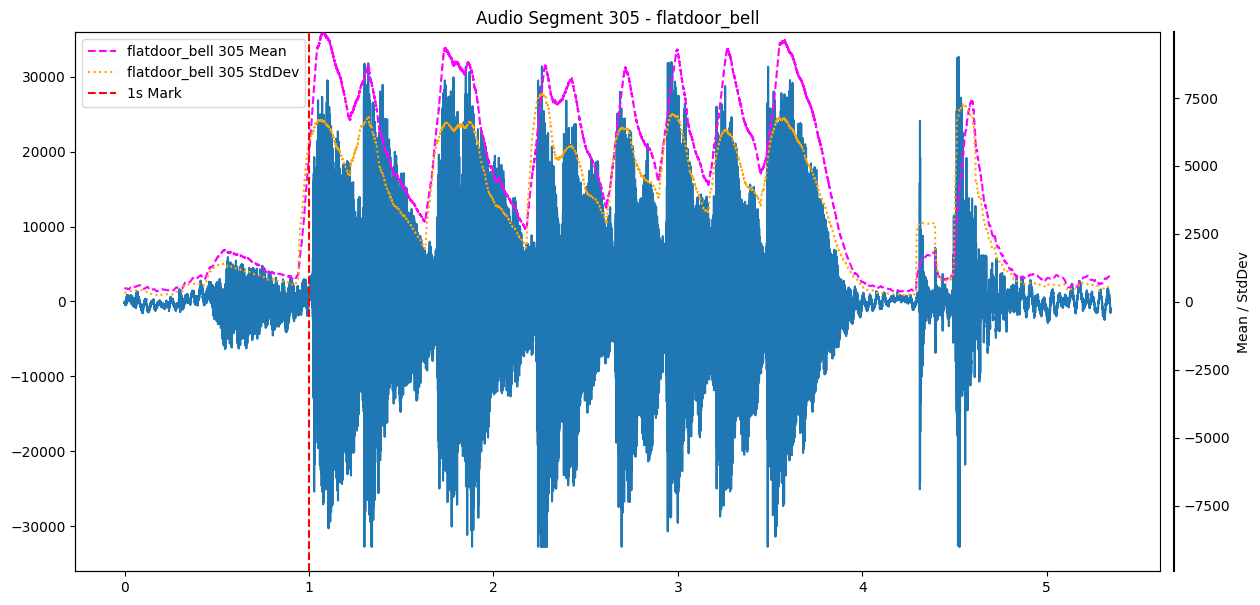

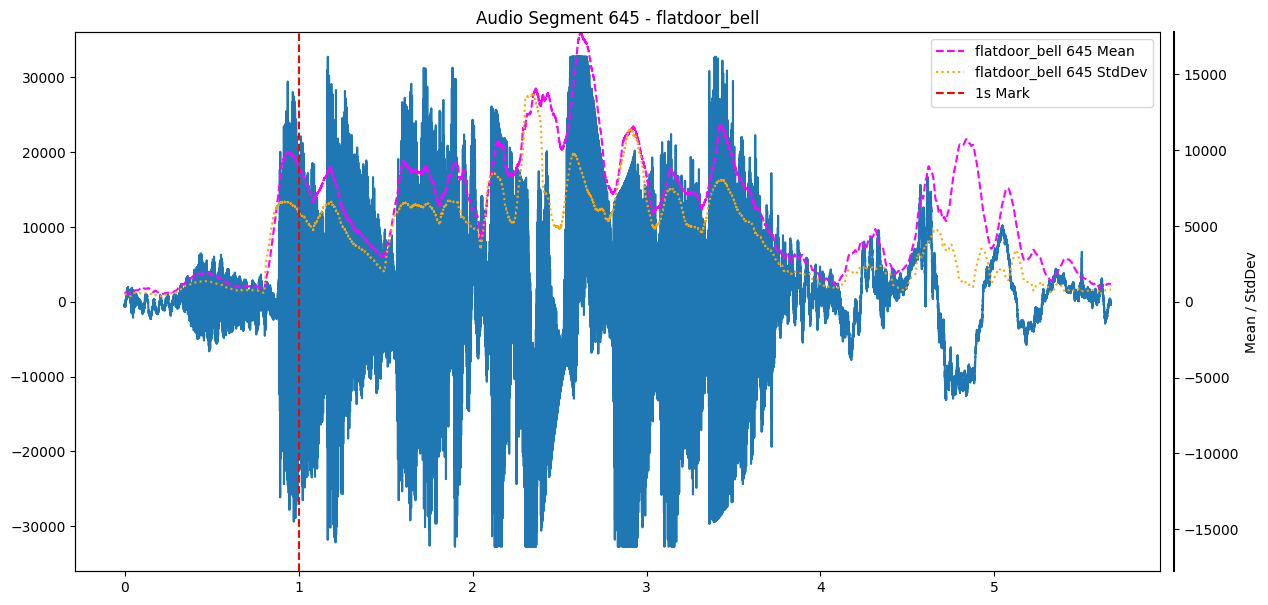

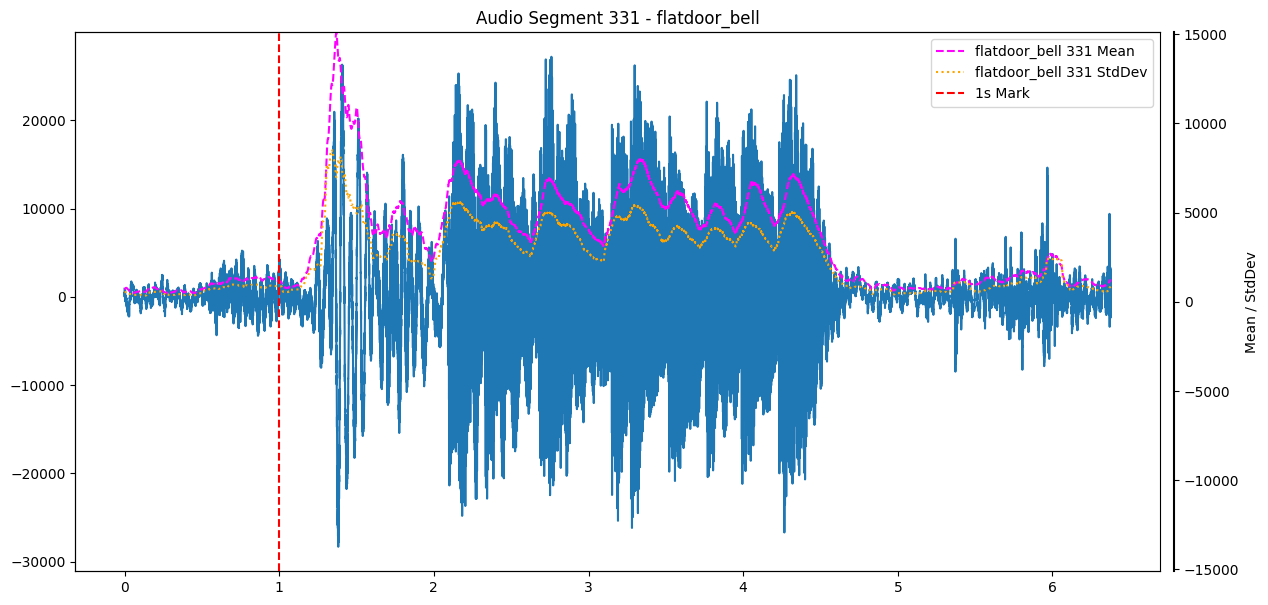

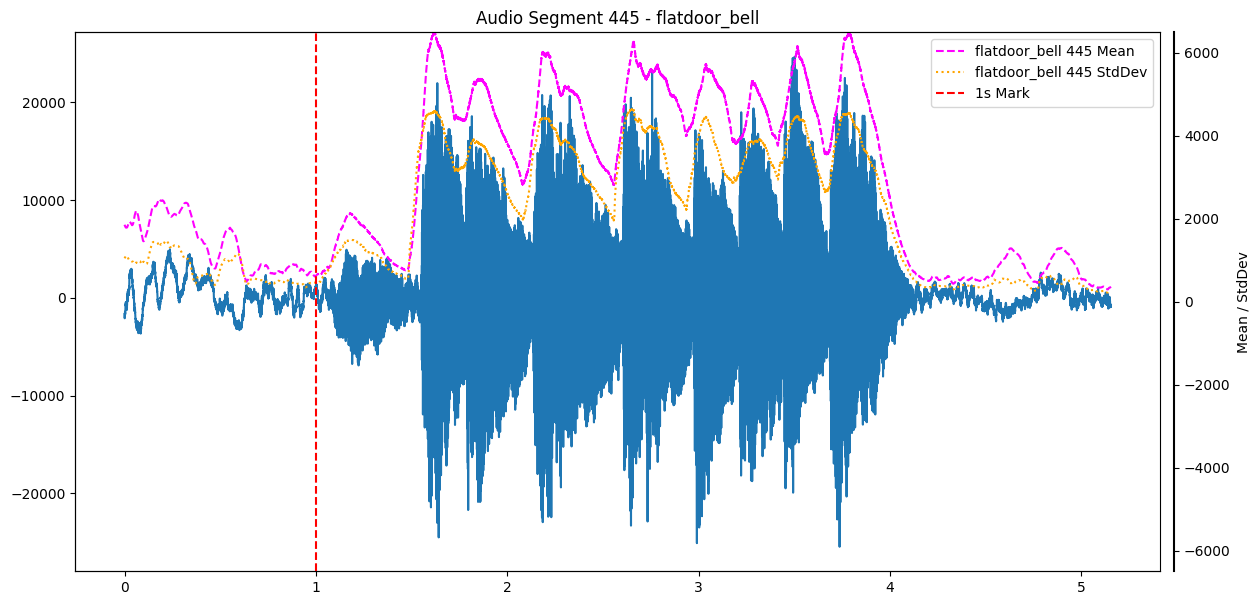

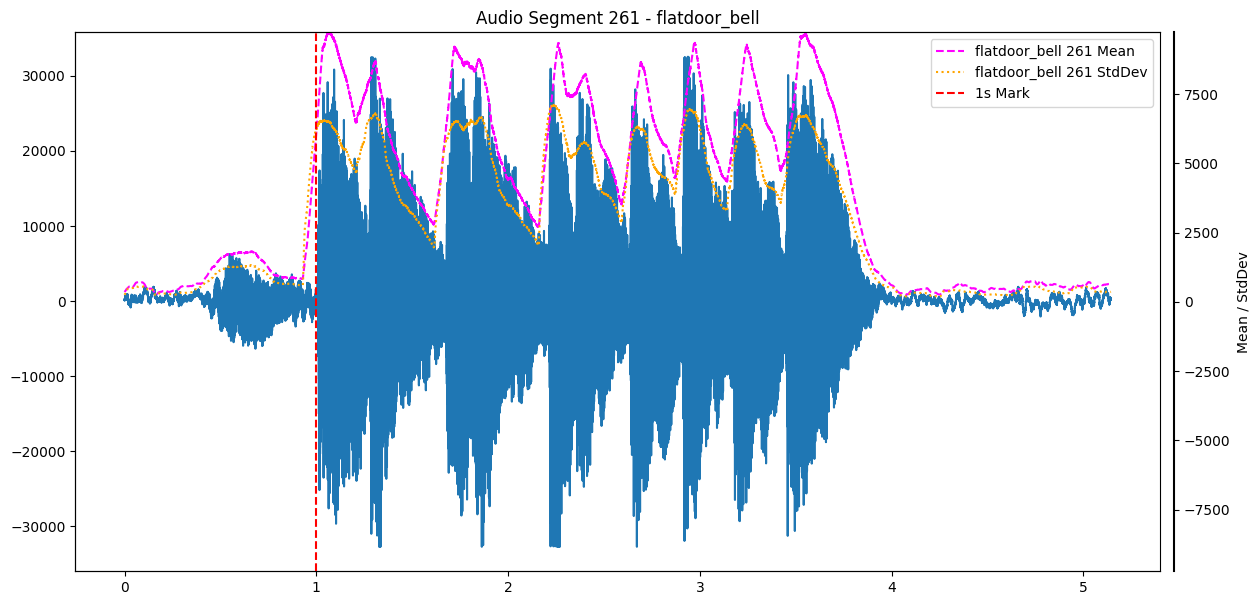

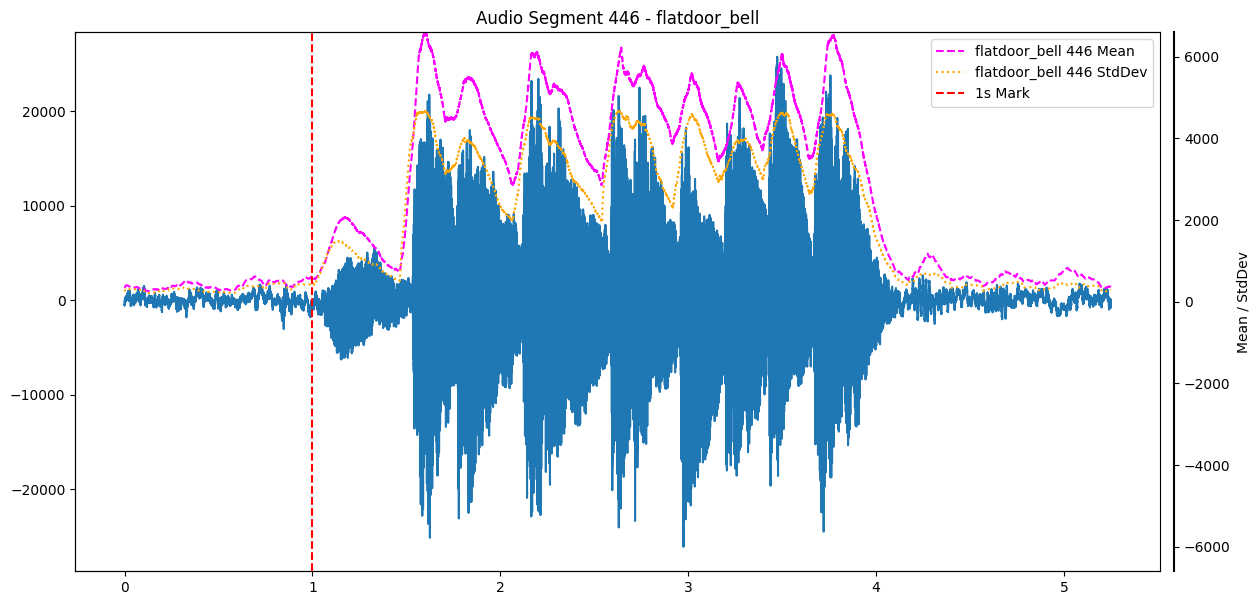

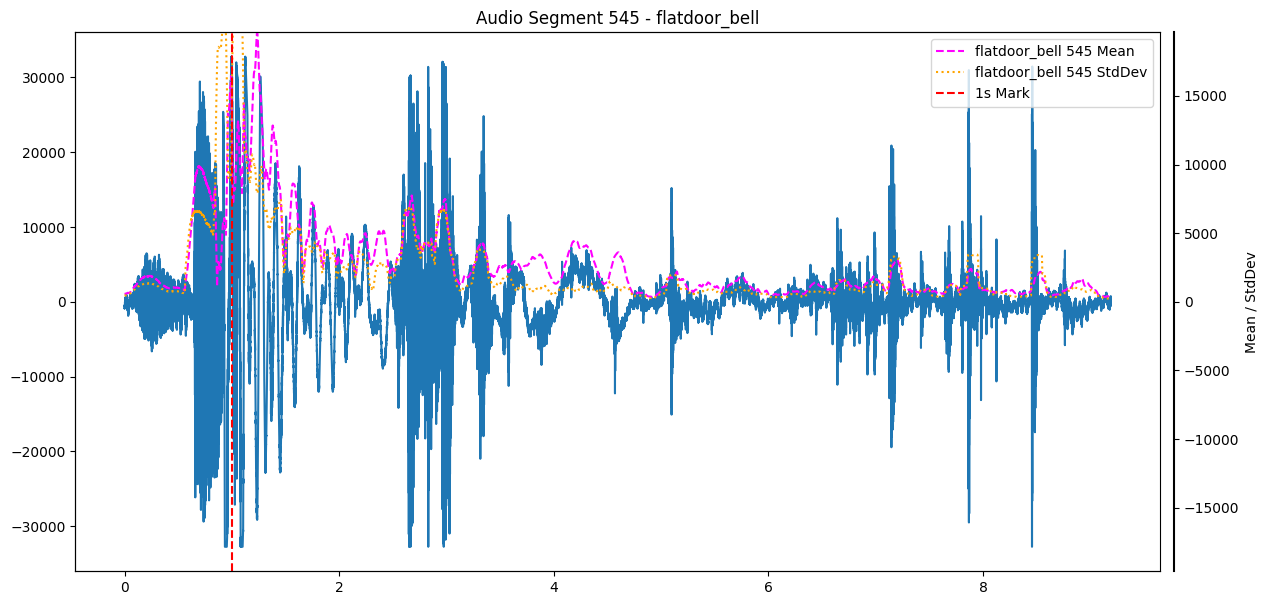

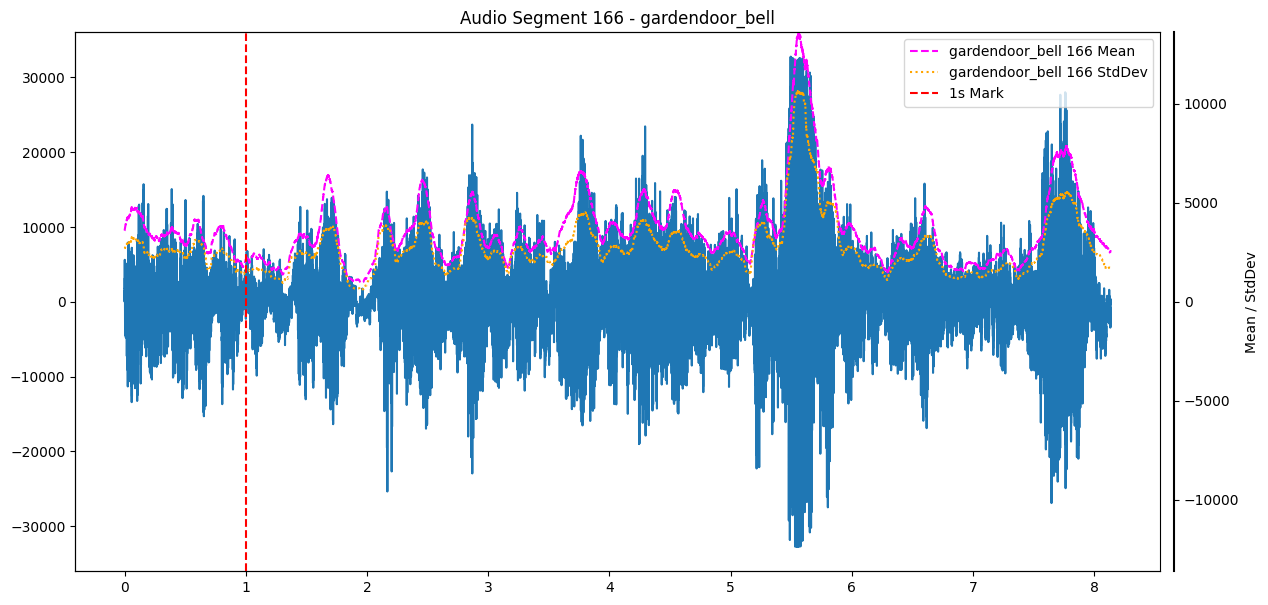

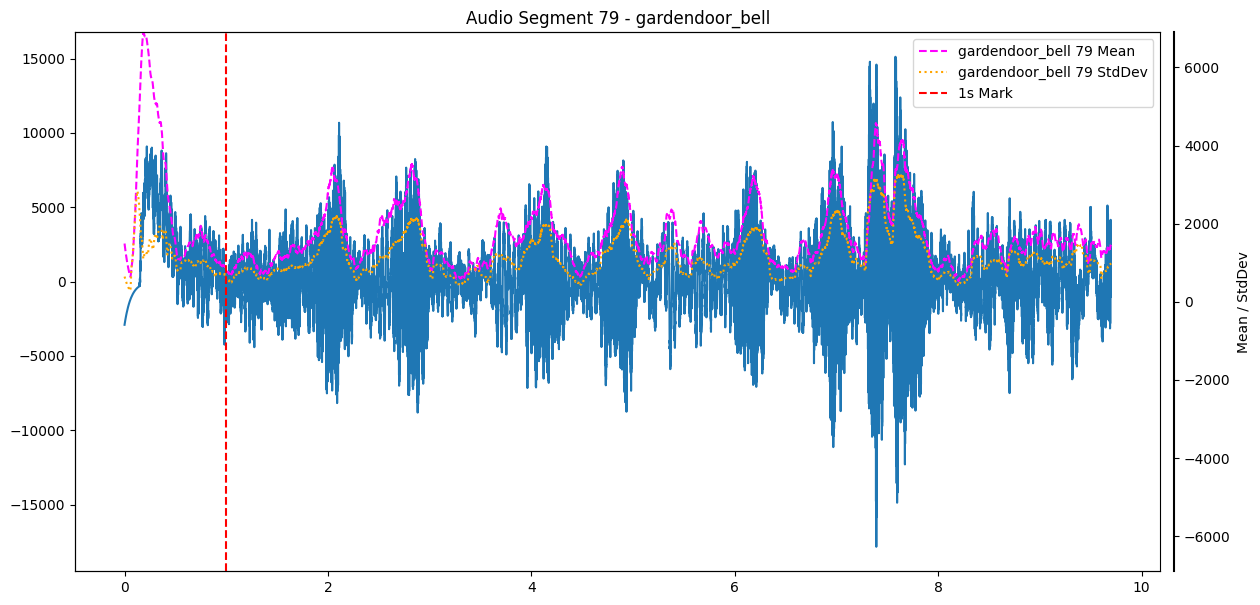

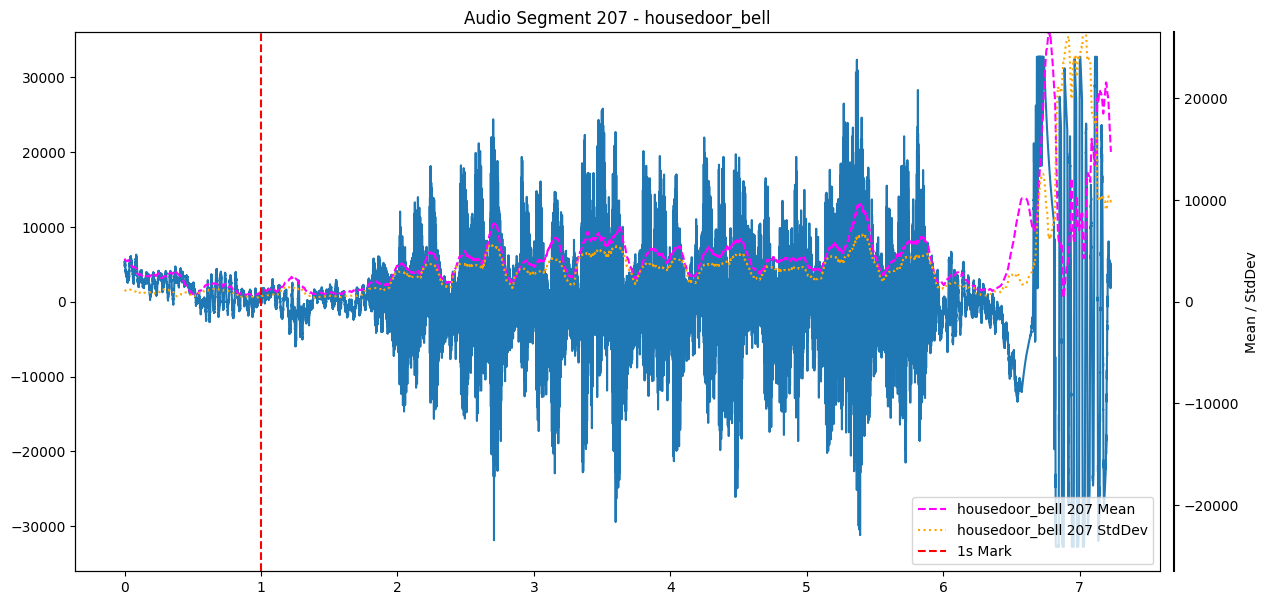

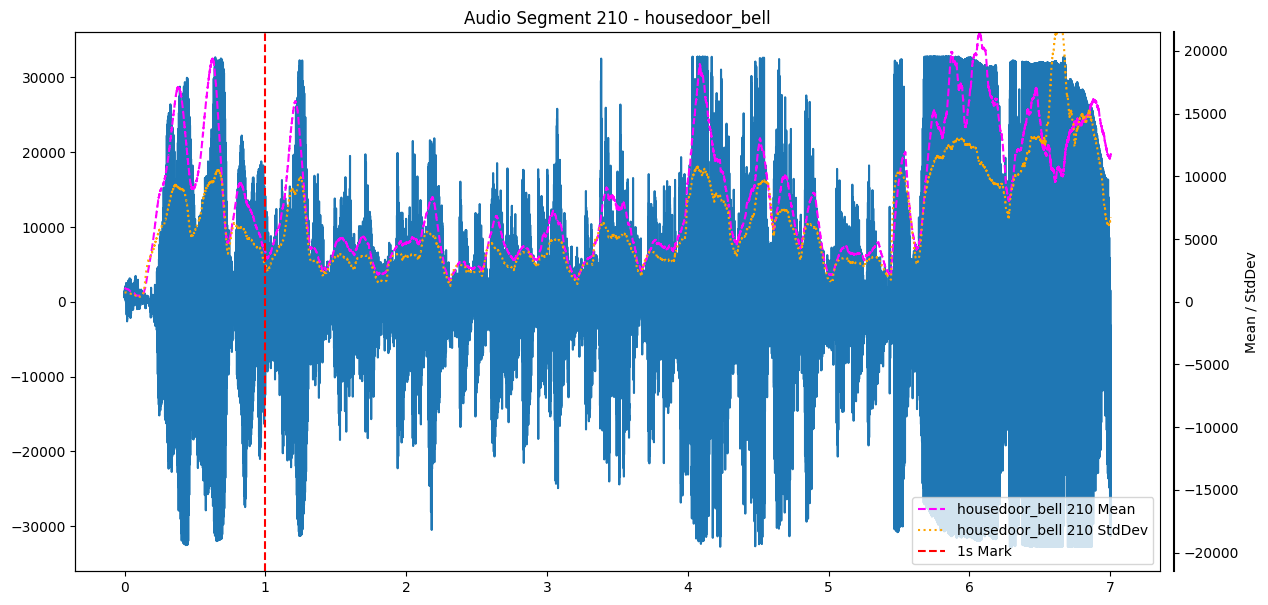

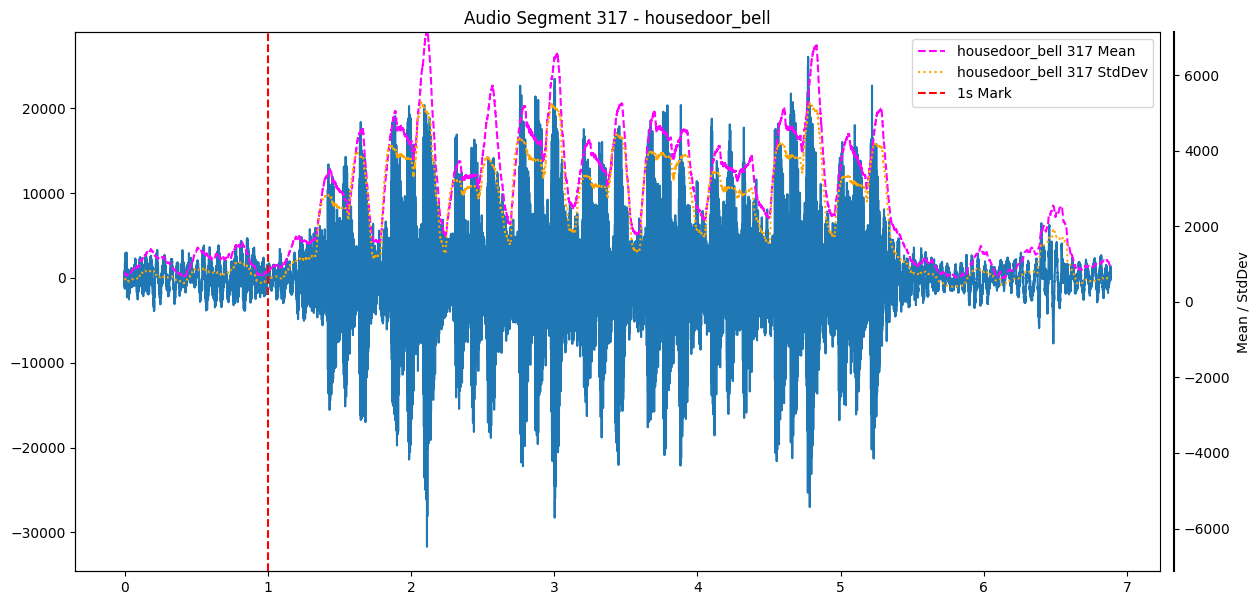

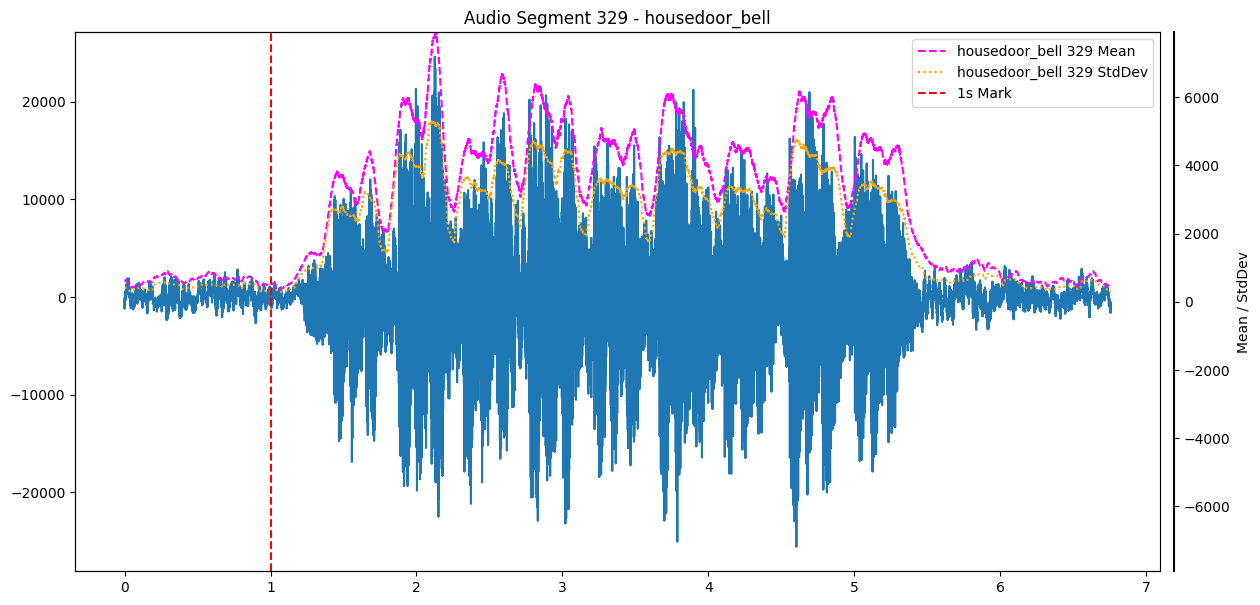

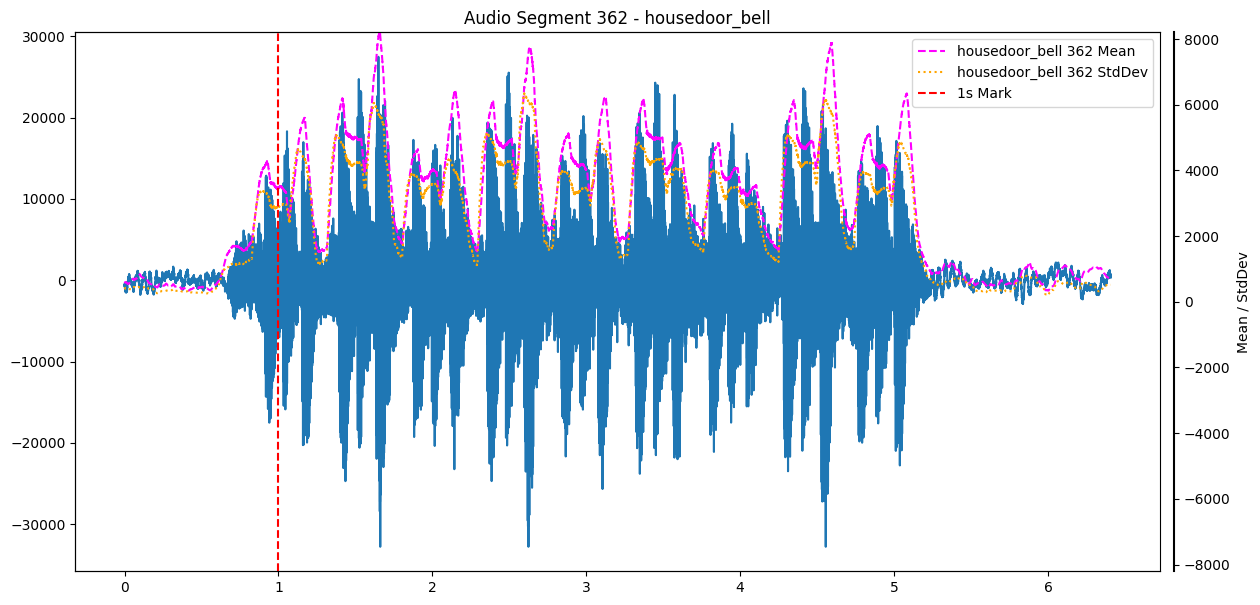

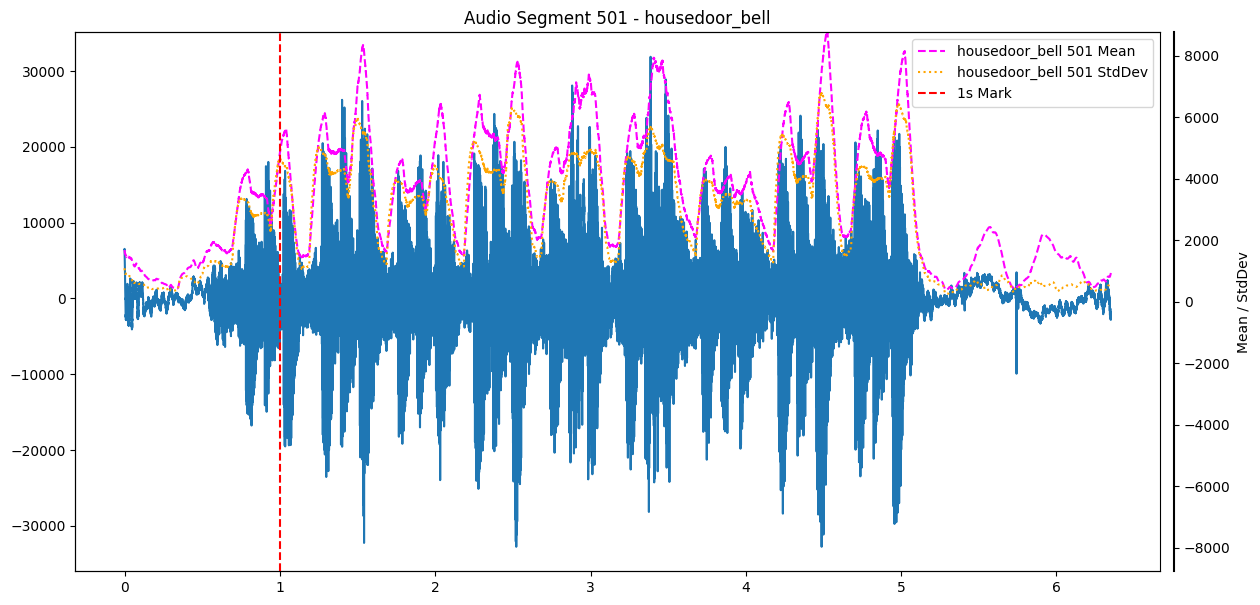

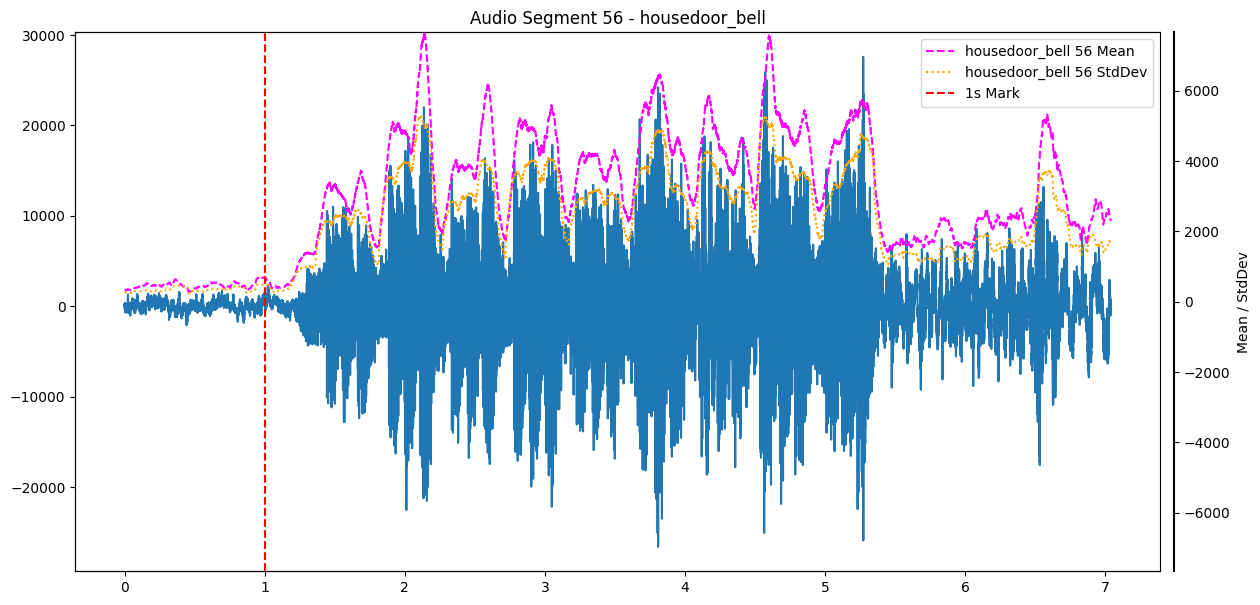

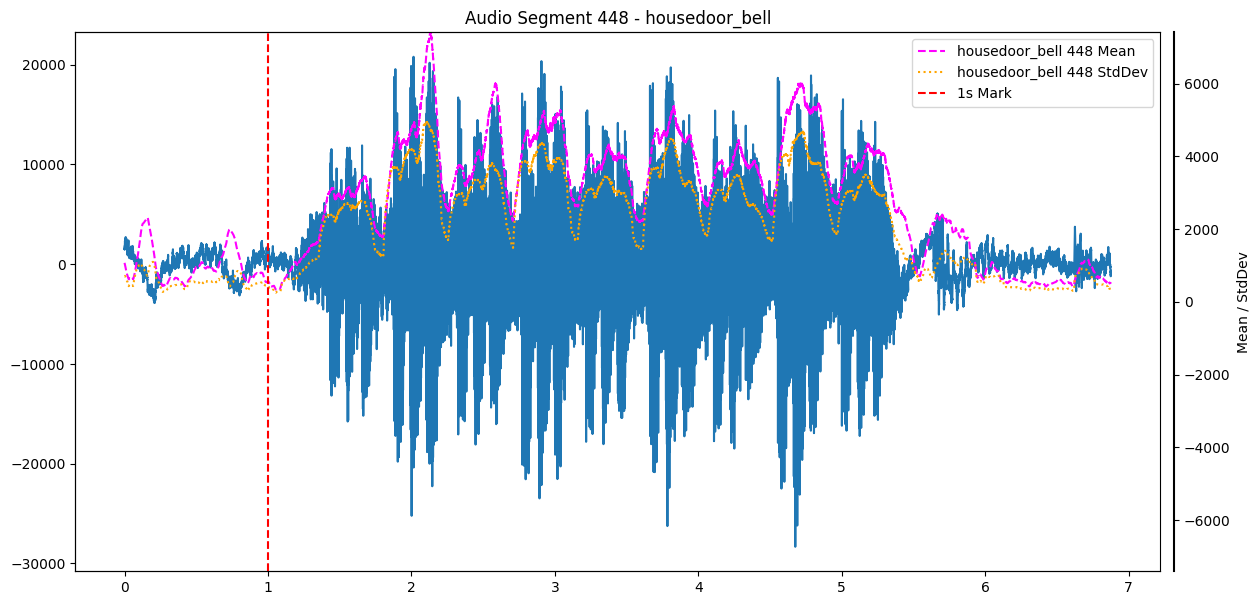

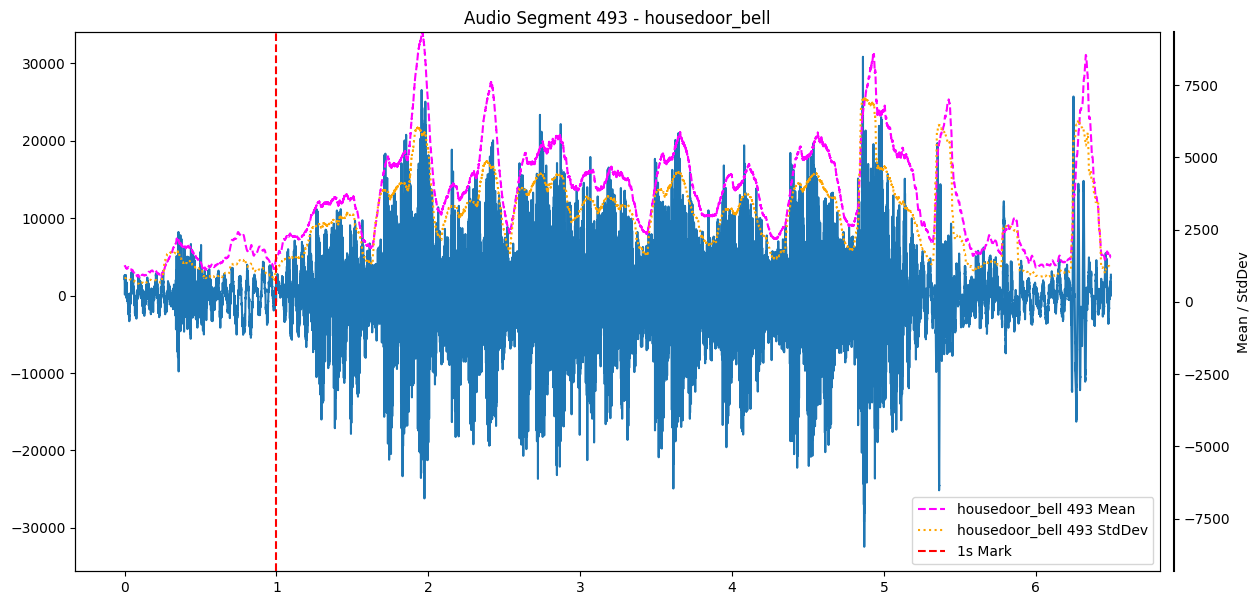

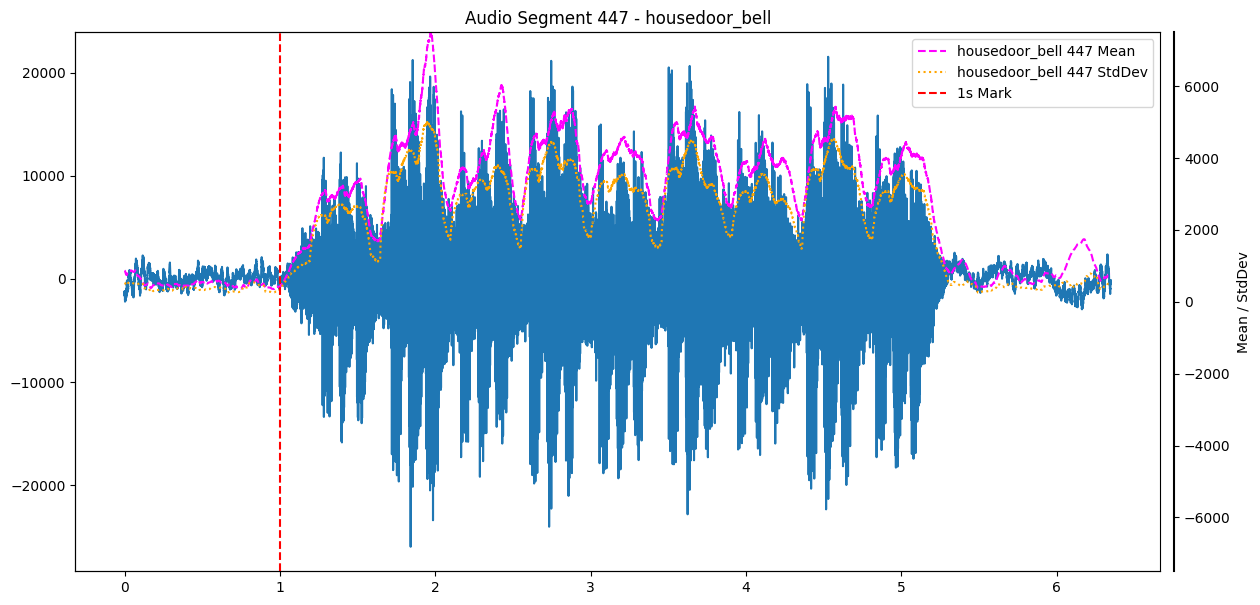

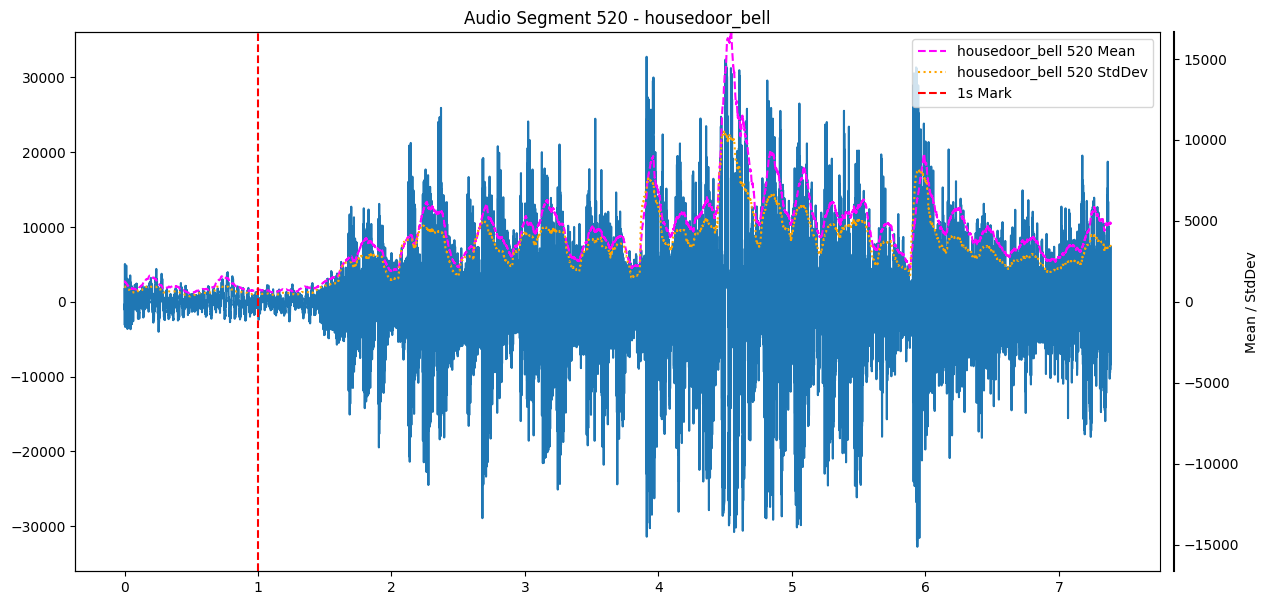

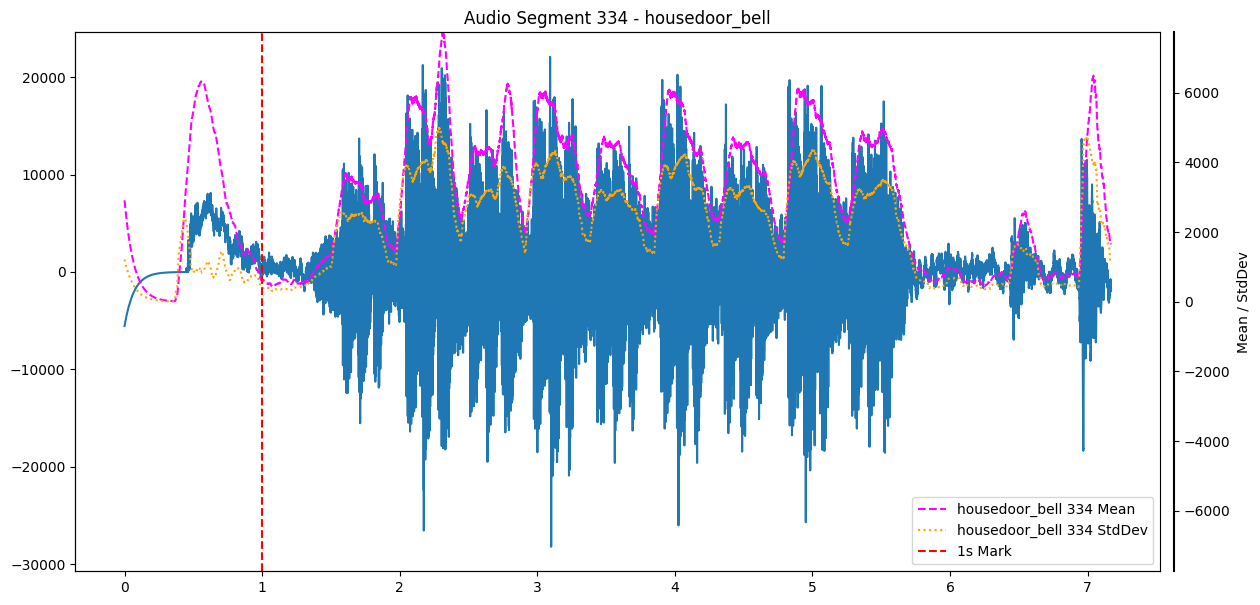

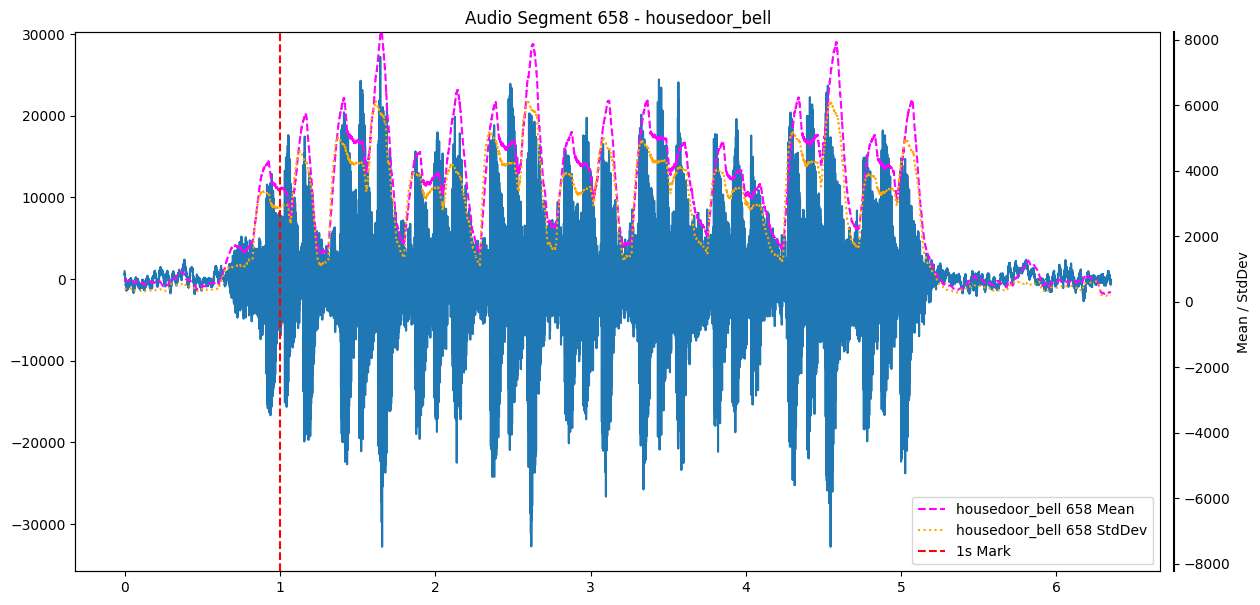

In [42]:
import plotly.graph_objects as go

# Add mean with sliding window of 100ms

import matplotlib.pyplot as plt
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


for index, row in filtered_annotations.iterrows():
    duration = row['duration'] + 2  # +2 to account for the 1s padding on both sides
    sample_rate = len(row['audio']) / duration
    time_axis = np.linspace(0, duration, len(row['audio']))
    
    window_size = int(0.1 * sample_rate)  # 100ms window size
    
    # Calculate the mean with sliding window
    audio_array = np.array(row['audio'])
    mean_audio = np.convolve(np.abs(audio_array), np.ones(window_size)/window_size, mode='valid')
    mean_time_axis = np.linspace(0, duration, len(mean_audio))
    
    # Calculate the standard deviation with sliding window
    squared_audio = np.square(np.int64(audio_array))
    mean_squared_audio = np.convolve(squared_audio, np.ones(window_size)/window_size, mode='valid')
    stddev_audio = np.sqrt(mean_squared_audio - np.square(mean_audio))
    
    # # Calculate SNR with sliding window
    # snr_window_start_idxs = np.arange(window_size, len(row['audio']) - window_size)
    # snr_window_end_idxs = np.arange(2 * window_size, len(row['audio']))
    # snr_audio_windowed = np.zeros(len(snr_window_end_idxs))
    # for i in range(len(snr_window_start_idxs)):
    #     snr_window_start = snr_window_start_idxs[i]
    #     snr_window_end = snr_window_end_idxs[i]
    #     snr = signaltonoise(audio_array[snr_window_start:snr_window_end])
    #     snr_audio_windowed[i] = snr
    
    # Create a new figure for each audio segment
    plt.figure(figsize=(14, 7))
    
    # Plot the original audio waveform
    plt.plot(time_axis, audio_array, label=f"{row['label']} {index}")
    
    # Plot the mean audio waveform
    # Create a twin y-axis to plot Mean and StdDev
    ax2 = plt.gca().twinx()
    
    # Plot the mean audio waveform
    ax2.plot(mean_time_axis, mean_audio, label=f"{row['label']} {index} Mean", linestyle='--', color='magenta')
    
    # Plot the standard deviation audio waveform
    ax2.plot(mean_time_axis, stddev_audio, label=f"{row['label']} {index} StdDev", linestyle=':', color='orange')
    
    # Move the axis to the right and scale it properly
    ax2.spines['right'].set_position(('outward', 10))
    ax2.spines['right'].set_linewidth(1.5)
    ax2.spines['right'].set_color('black')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.tick_params(axis='y', colors='black')
    ax2.yaxis.label.set_color('black')
    ax2.set_ylabel('Mean / StdDev')
    ax2.set_ylim(-mean_audio.max(), mean_audio.max())
    

    # Create a twin y-axis to plot SNR
    # ax2 = plt.gca().twinx()
    # ax2.plot(snr_window_start_idxs / sample_rate, snr_audio_windowed, label=f"{row['label']} {index} SNR", linestyle='-.', color='blue')
    
    # # Move the axis to the right and scale it properly
    # ax2.spines['right'].set_position(('outward', 10))
    # ax2.spines['right'].set_linewidth(1.5)
    # ax2.spines['right'].set_color('blue')
    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.tick_right()
    # ax2.tick_params(axis='y', colors='blue')
    # ax2.yaxis.label.set_color('blue')
    # ax2.set_ylabel('SNR')
    
    # Add a vertical line at 1s
    plt.axvline(x=1, color='red', linestyle='--', label='1s Mark')
    
    # Update layout
    plt.title(f'Audio Segment {index} - {row["label"]}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mean / StdDev')
    plt.legend()
    
    # Show the figure
    plt.show()


Some of the samples are very noisy, but for estimating some mean value when to start recording for the data collection script, this should be enough. Looks like when the mean reaches 1000 I should record everything wich is about 200ms before and do some recording for 7 seconds.

# Feature extraction
This section is dome explorative experimentation regarding feature extraction. I will start with Mel-Ceptrum features.

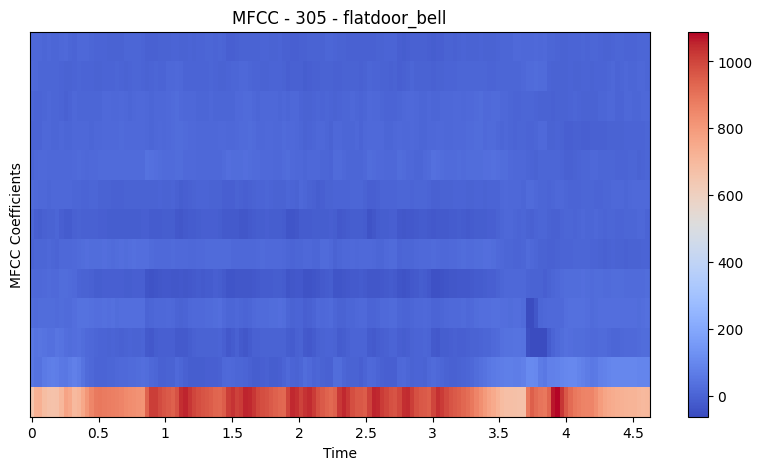

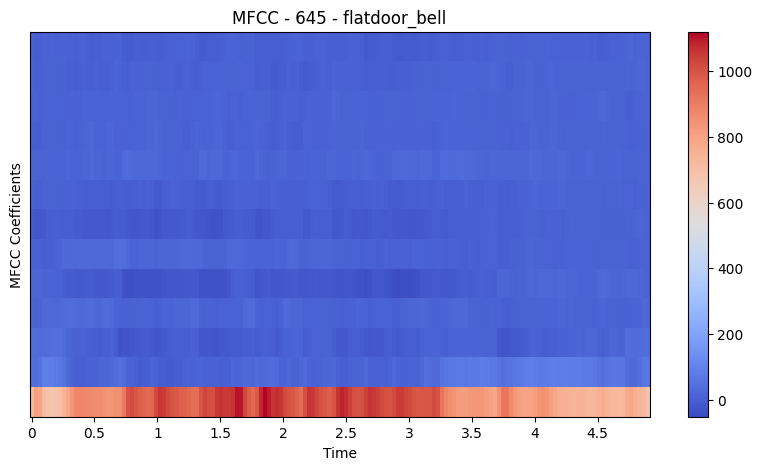

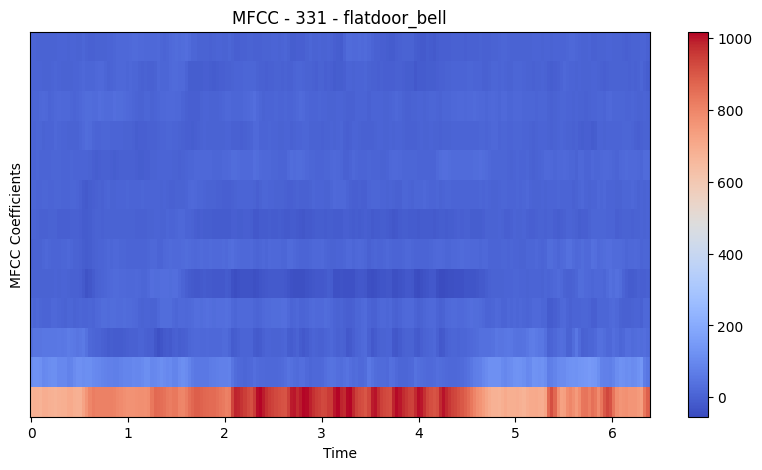

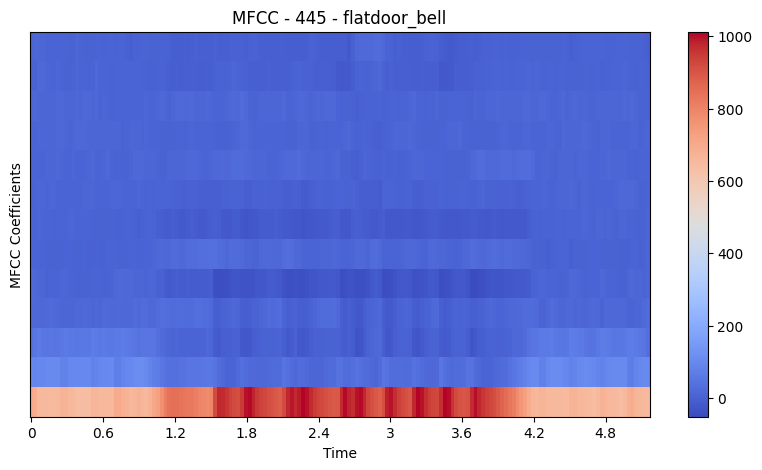

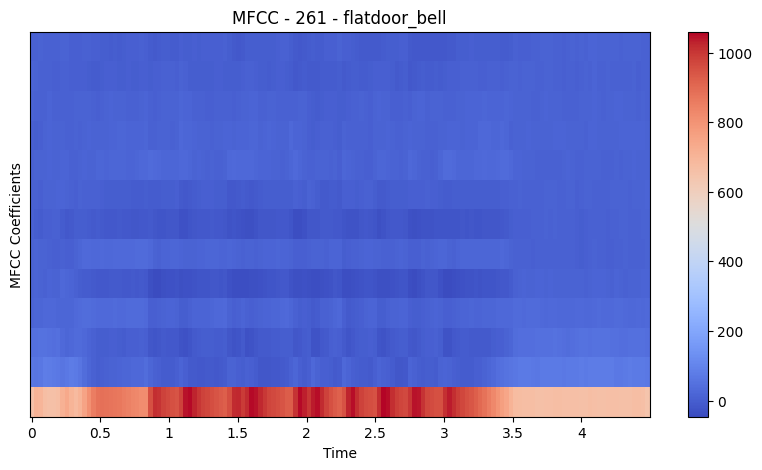

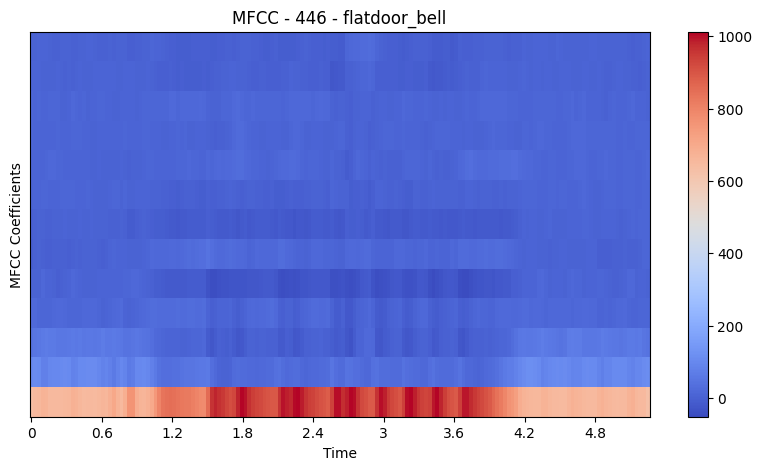

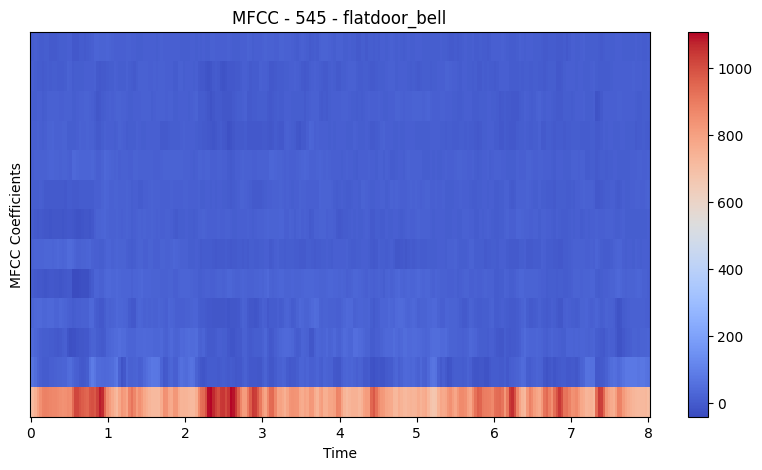

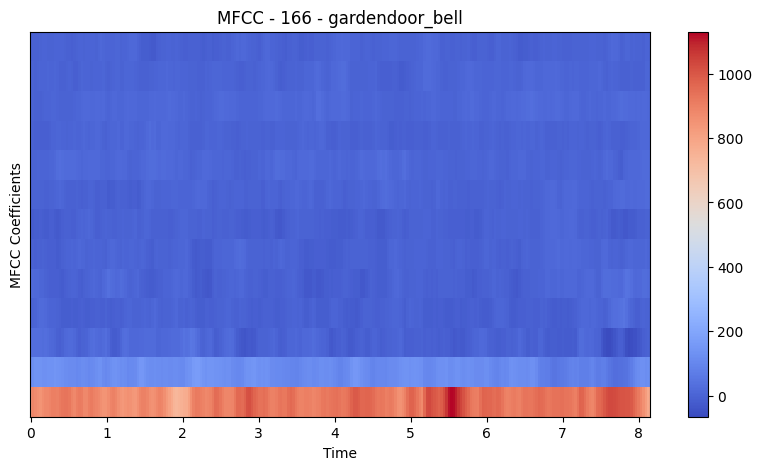

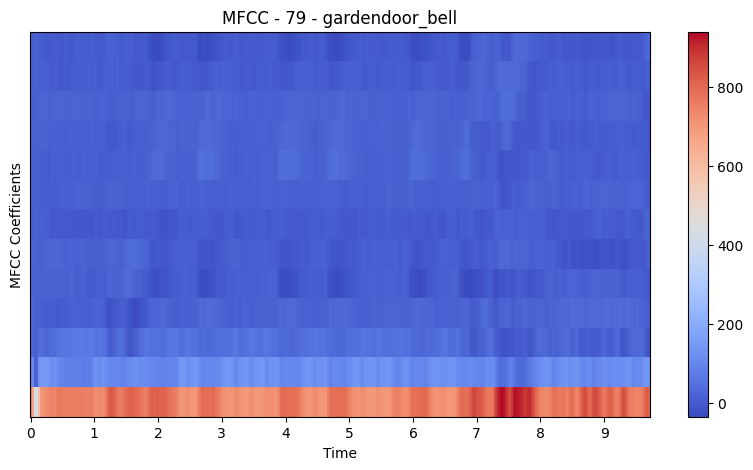

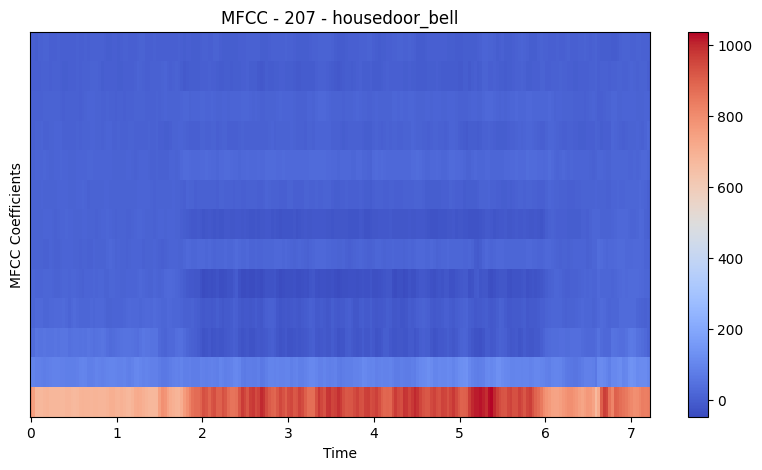

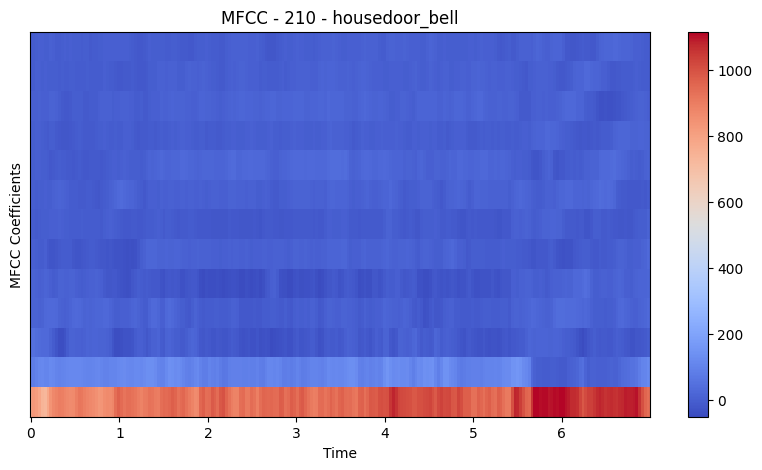

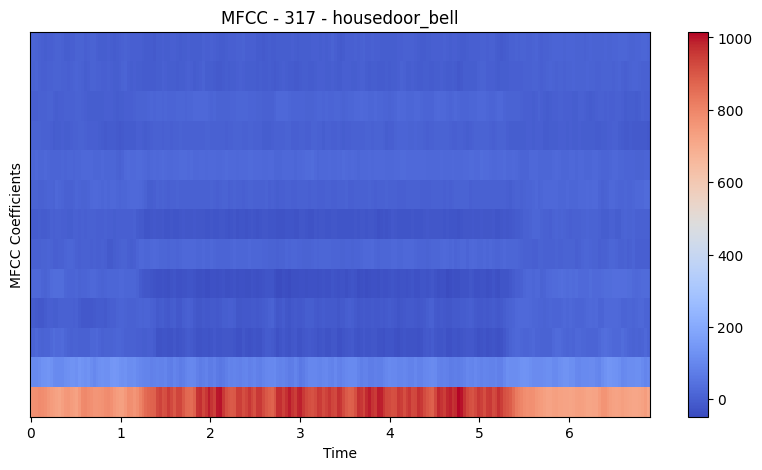

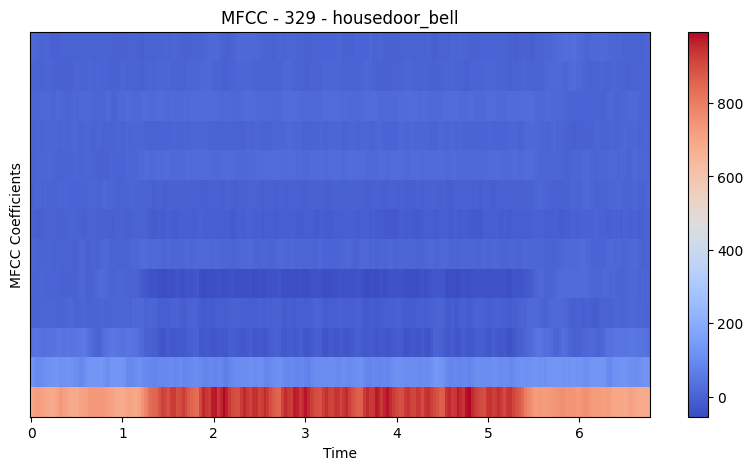

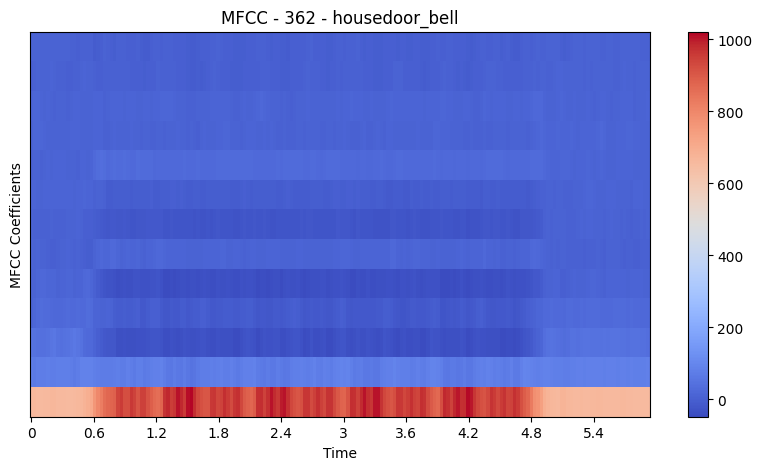

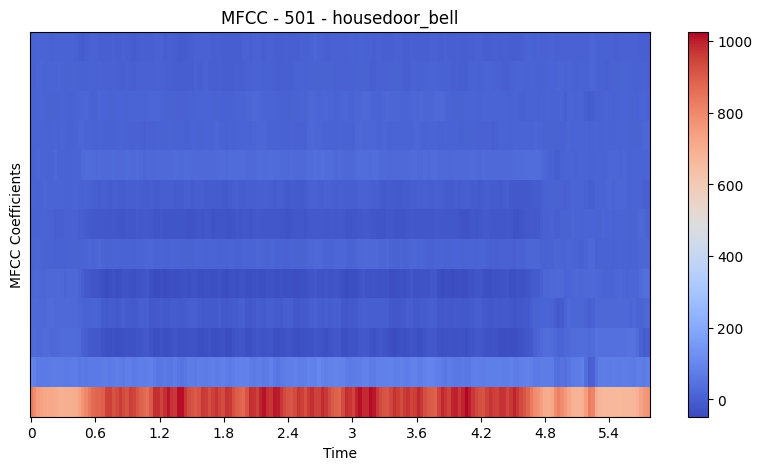

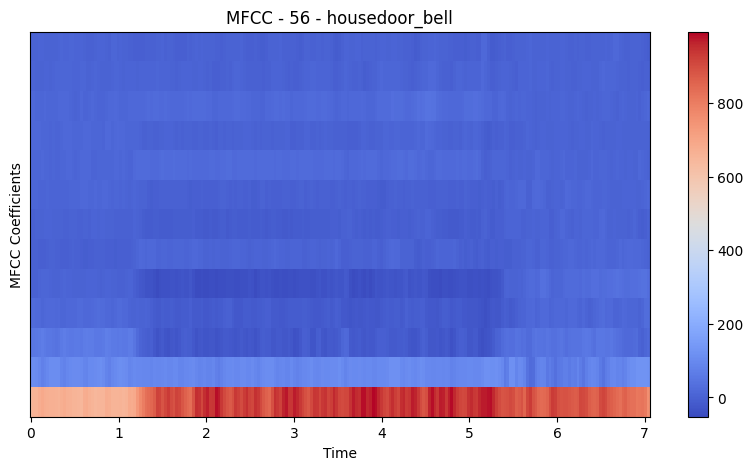

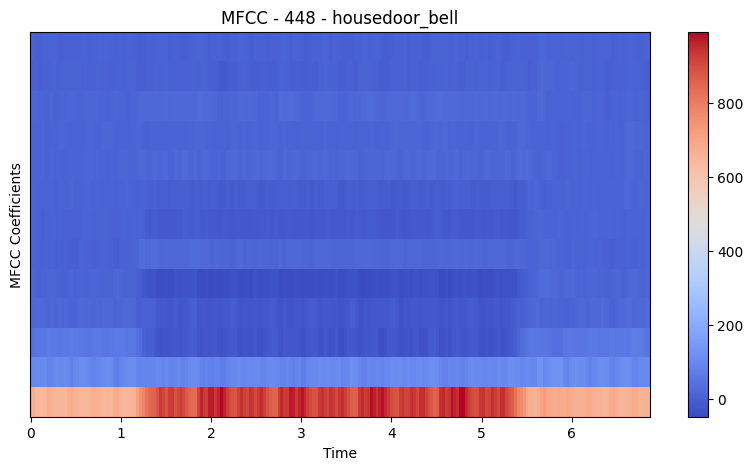

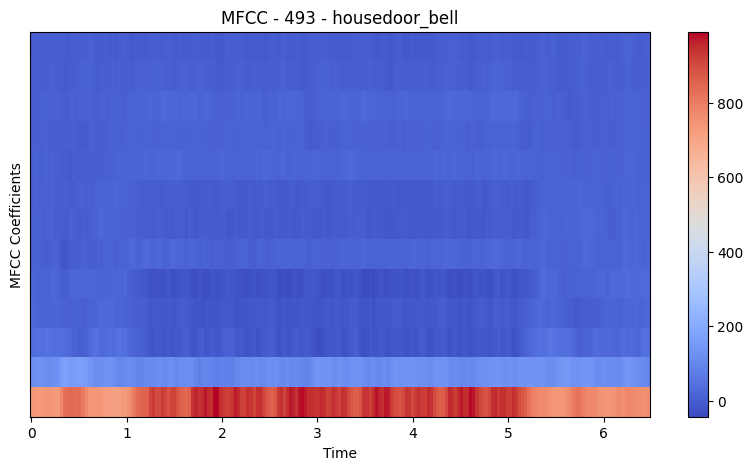

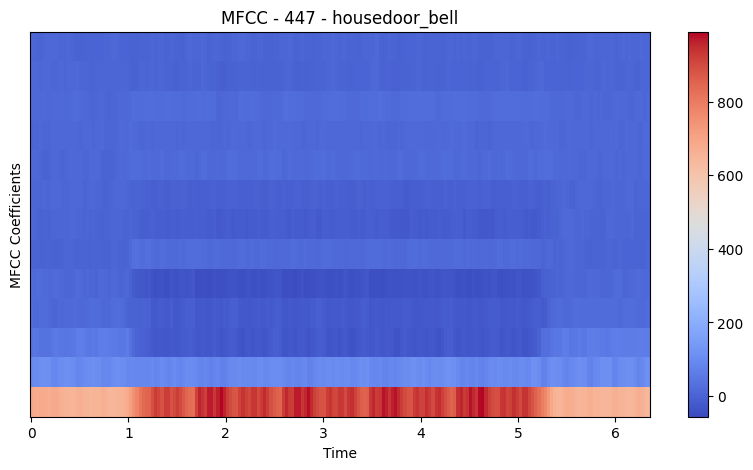

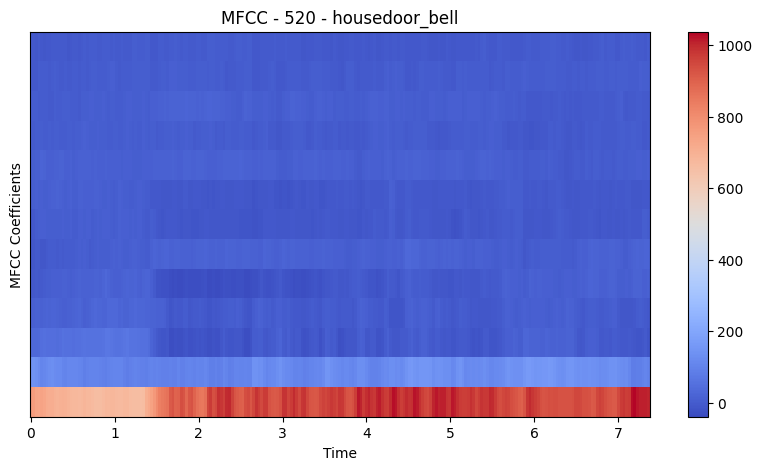

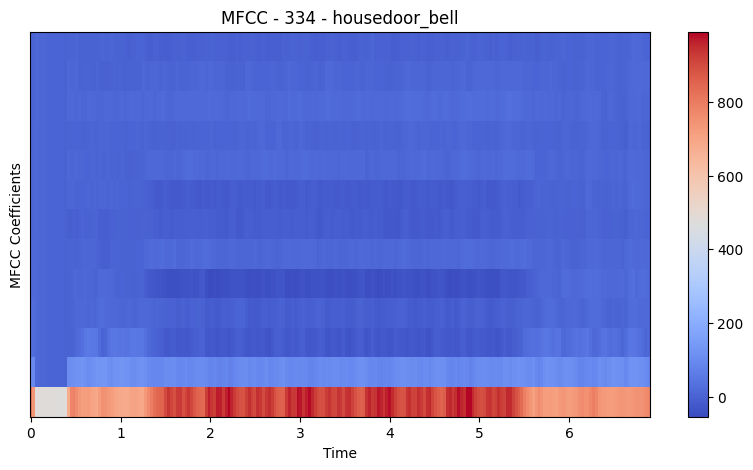

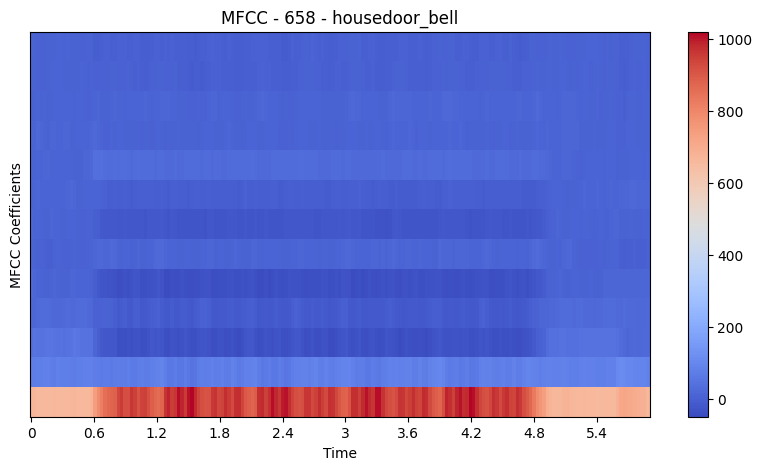

In [47]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

for index, row in filtered_annotations.iterrows():
    duration = row['duration'] + 2  # +2 to account for the 1s padding on both sides
    sample_rate = len(row['audio']) / duration

    mfccs = librosa.feature.mfcc(y=np.array(row['audio'], dtype=np.float64), sr=sample_rate, n_mfcc=13)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mfccs, sr=16000, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {index} - {row["label"]}')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

Ok, the information seem to be almost completly in the lower coefficients, but some artifacts are also in the higher components (to be honest, I am not sure whether this is by nature of MCF).
In some samples it is quite easy to see that when the ring starts, on others it's much harder (probably the noisy ones). At least the housedoor bell (my desired main target) seems to be quite easy to ditinguish. Netxt I need to determine how big the audio chunks should be (I think about 100ms - 500ms) to start training on.